Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. 
Проверьте размер таблицы, типы переменных.

# Описание данных

user_data:

client – идентификатор пользователя

premium – является ли клиент премиум

age – возраст

logs:

client – идентификатор пользователя

success – результат (успех - 1, нет - 0)

platform – платформа

time – время в формате Unix




In [1]:
import pandas as pd

In [2]:
user_data = pd.read_csv('3_user_data.csv')
logs = pd.read_csv('3_logs.csv')

In [3]:
user_data.shape

(2954, 3)

In [4]:
logs.shape

(4500, 4)

In [5]:
# Типы переменных в user_data:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [6]:
# Типы переменных в logs:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

# Задание 1 

Вопрос: Сколько уникальных значений принимает переменная platform?

In [7]:
logs.columns

Index(['client', 'success', 'platform', 'time'], dtype='object')

In [8]:
# Количество уникальных значений переменной platform
unique_platforms_logs = logs['platform'].nunique()
print(f"Количество уникальных значений переменной platform в logs: {unique_platforms_logs}")

Количество уникальных значений переменной platform в logs: 3


# Задание 2

С какой платформы осуществляется наибольшее количество успешных операций? (success == True)


Подсказка: вспомните команды из прошлого занятия 

Название_датафрейма.query('success == True').platform.value_counts()

а еще команда idxmax()

In [9]:
successful_operations = logs.query('success == True')

In [10]:
# Количество успешных операций для каждой платформы
platform_counts = successful_operations['platform'].value_counts()

# Платформа с наибольшим количеством успешных операций
most_successful_platform = platform_counts.idxmax()

In [11]:
platform_counts

platform
phone       2019
computer    1090
tablet       180
Name: count, dtype: int64

In [12]:
most_successful_platform

'phone'

# Задание 3

Какой клиент совершил больше всего успешных операций?

Внимание: Несколько пользователей могли совершить одинаковое число успешных действий

Подсказка: вспомните команды из прошлого урока 

Название_датафрейма.query('success == True').client.value_counts()

также поможет команда max()

In [13]:
# Количество успешных операций для каждого клиента
client_counts = successful_operations['client'].value_counts()

# Клиент с наибольшим количеством успешных операций
most_successful_client = client_counts.idxmax()

In [14]:
client_counts

client
61473    41
78349    41
36165    41
61468    41
92584    41
         ..
50300     1
51575     1
3553      1
502       1
11983     1
Name: count, Length: 2845, dtype: int64

In [15]:
# Клиент, совершивший больше всего успешных операций:
most_successful_client

np.int64(61473)

# Задание 4

Объедините два датафрейма в один по столбцу 'client'

Подсказка: Название_датафрейма_1.merge(Название_датафрейма_2, on='client')

In [16]:
merged_df = user_data.merge(logs, on='client')

In [17]:
merged_df.head()

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918


# Задание 5

Какая платформа наиболее популярна среди премиумных клиентов? (premium == True)

In [18]:
# Премиум клиенты
premium_clients = user_data.query('premium == True')

# Объединяем с датасетом logs, чтобы получить платформы
premium_logs = premium_clients.merge(logs, on='client')

# Количество операций для каждой платформы среди премиумных клиентов
premium_platform_counts = premium_logs['platform'].value_counts()

# Наиболее популярная платформа
most_popular_platform = premium_platform_counts.idxmax()

In [19]:
premium_platform_counts

platform
phone       246
computer    150
tablet       24
Name: count, dtype: int64

In [20]:
# Наиболее популярная платформа среди премиумных клиентов: 
{most_popular_platform}

{'phone'}

# Задание 6

Сделайте выборку для премиальных клиентов (premium` == True) и для непримеальных.

На основе этих выборок постройте графики, первый - отображающий популярность использования различных платформ (столбец "platform") у премиальных пользователей и второй - платформы сради непримиальных пользователей. 

Подсказка: используйте sns.countplot(x=название_выборки["столбец"])

In [21]:
import seaborn as sns

In [22]:
import matplotlib.pyplot as plt

In [23]:
# Премиальные клиенты
premium_clients = user_data.query('premium == True')
premium_logs = premium_clients.merge(logs, on='client')

In [24]:
# Непримиальные клиенты
non_premium_clients = user_data.query('premium == False')
non_premium_logs = non_premium_clients.merge(logs, on='client')

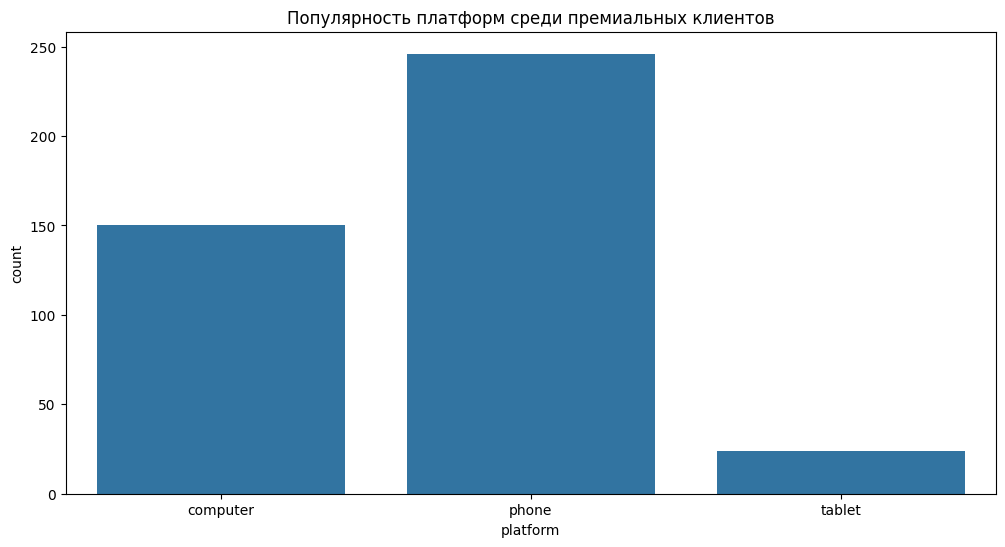

In [25]:
# График для премиальных клиентов
plt.figure(figsize=(12, 6))
sns.countplot(x=premium_logs['platform'])
plt.title('Популярность платформ среди премиальных клиентов')
plt.show()

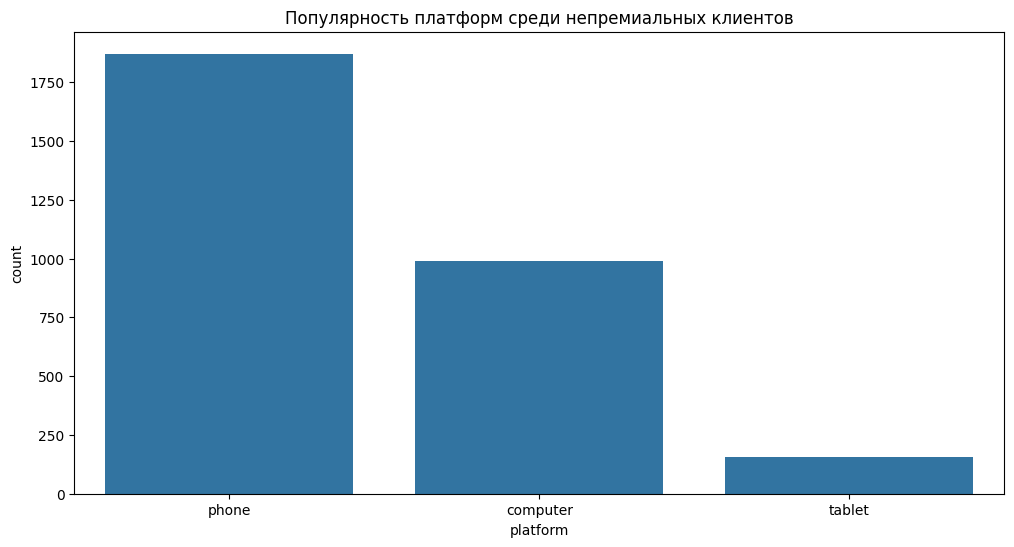

In [26]:
# График для непремиальных клиентов
plt.figure(figsize=(12, 6))
sns.countplot(x=non_premium_logs['platform'])
plt.title('Популярность платформ среди непремиальных клиентов')
plt.show()

# Задание 7

Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, y – число успешных операций. 

Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки.

Подсказка: sns.countplot(data=Название_Датафрейма.loc[(Название_Датафрейма.platform == 'computer')
                                   & (Название_Датафрейма.success == True)], x='age')

In [27]:
# Объединяем датафреймы logs и user_data по столбцу 'client'
merged_df = logs.merge(user_data[['client', 'age']], on='client')

In [28]:
# Успешные операции на платформе computer
computer_success = merged_df.loc[(merged_df['platform'] == 'computer') & (merged_df['success'] == True)]

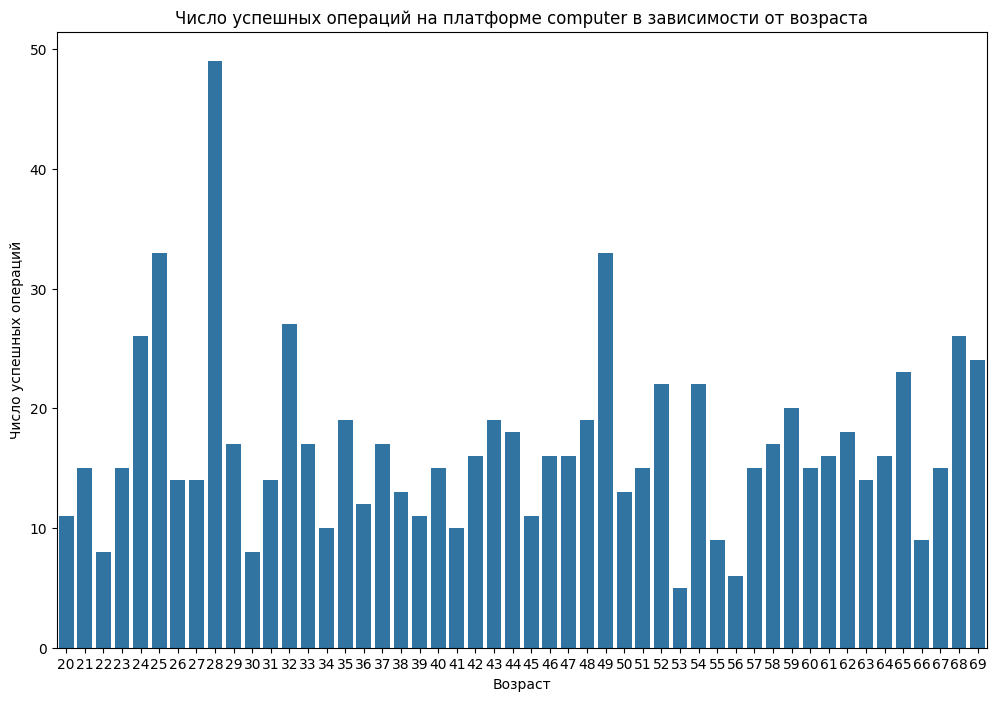

In [29]:
# График
plt.figure(figsize=(12, 8))
sns.countplot(data=computer_success, x='age')
plt.title('Число успешных операций на платформе computer в зависимости от возраста')
plt.xlabel('Возраст')
plt.ylabel('Число успешных операций')
plt.show()

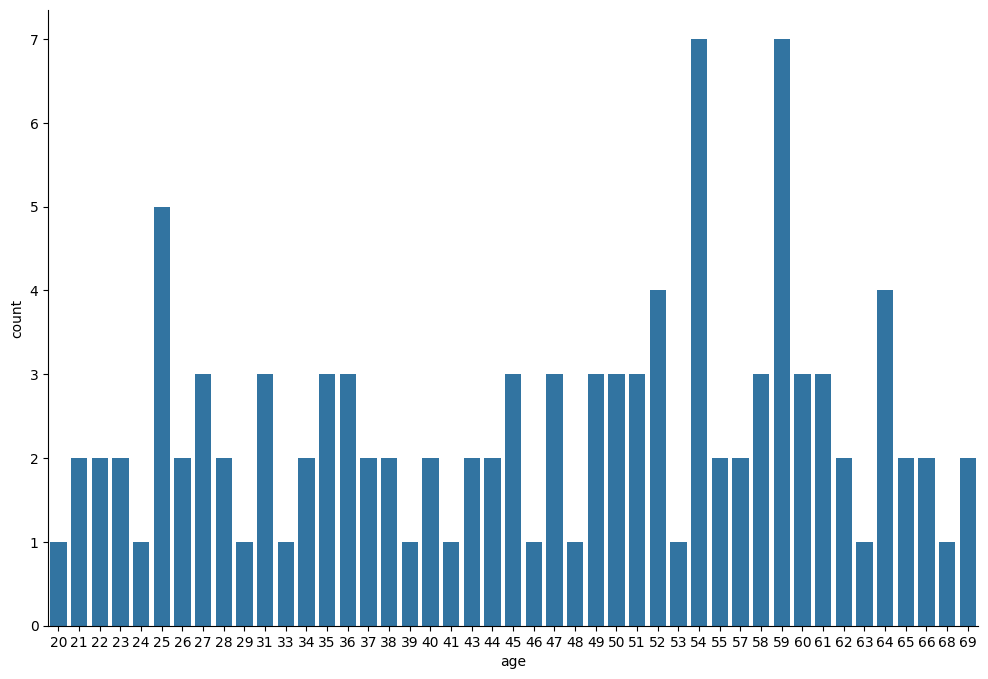

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.countplot(data=premium_logs.loc[(premium_logs.platform == 'computer')
& (premium_logs.success == True)],
x='age')
sns.despine()